####Facebook Prophet model for Daily Births Forecasting with Machine Learning.

In [14]:
import pandas as pd
import numpy as np

import warnings
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("daily-total-female-births.csv", parse_dates=['Date'], date_parser=pd.to_datetime)
df.columns = ['ds', 'y']
df.head()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-15-9ff60de5f55c>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv("daily-total-female-births.csv", parse_dates=['Date'], date_parser=pd.to_datetime)

  df = pd.read_csv("daily-total-female-births.csv", parse_dates=['Date'], date_parser=pd.to_datetime)



,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Text(0.5, 1.0, 'Daily Female Births in 1959')

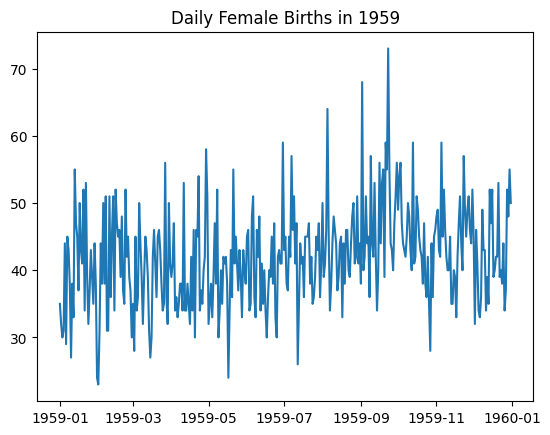

In [16]:
plt.plot(df['ds'], df['y']);
plt.title('Daily Female Births in 1959')

WARNING - (py.warnings._showwarnmsg) - <ipython-input-19-fc13ec22279f>:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv("daily-total-female-births.csv", parse_dates=['Date'], date_parser=pd.to_datetime)

  df = pd.read_csv("daily-total-female-births.csv", parse_dates=['Date'], date_parser=pd.to_datetime)



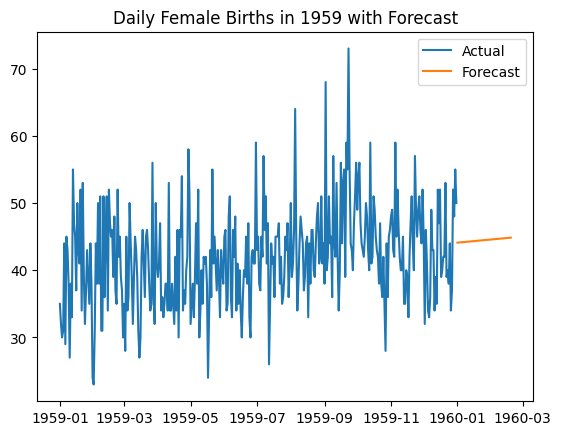

In [19]:
!pip install statsmodels
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your data (assuming it's the same as before)
df = pd.read_csv("daily-total-female-births.csv", parse_dates=['Date'], date_parser=pd.to_datetime)
df.columns = ['ds', 'y']

# Fit an Exponential Smoothing model
# Removing seasonality as there is not enough data to support it
model = ExponentialSmoothing(df['y'], trend='add', seasonal=None)
fit = model.fit()

# Forecast 50 periods into the future
forecast = fit.forecast(50)

# Create a future dataframe for plotting
future_dates = pd.date_range(start=df['ds'].iloc[-1], periods=51, freq='D')[1:] # Start from the day after the last data point
future_df = pd.DataFrame({'ds': future_dates, 'yhat': forecast})

# Plot the original data and the forecast
plt.plot(df['ds'], df['y'], label='Actual')
plt.plot(future_df['ds'], future_df['yhat'], label='Forecast')
plt.title('Daily Female Births in 1959 with Forecast')
plt.legend()
plt.show()

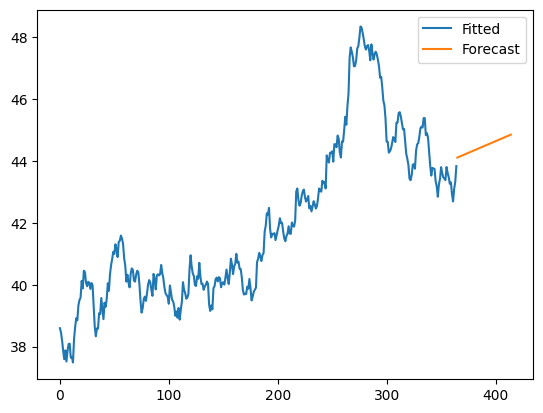

In [22]:
# ... (rest of your code)

# Plot the components of the forecast
fit.fittedvalues.plot(label='Fitted')
fit.forecast(50).plot(label='Forecast')
plt.legend()
plt.show()